## L1 – Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can find basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) problems.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we focus on supervised learning only. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is a matrix, where $i$-th row is a feature vector of $i$-th object and $Y$ – a vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and train regression model.
2. Plot train data and model's predictions.
3. As you can see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

In [1]:
# Исправить: нормализация распределения, MSE на трейне и тд

I'll generate samples with random module:

In [2]:
import numpy as np
import scipy.linalg as linal
import math
import random as rnd
random_X = []
random_Y = []
for i in range(20):
    random_X.append(round(rnd.random(), 10) * (2 * math.pi)) #[a, b) - rn * (b - a) + a
    eps = (round(rnd.random(), 10) * 0.225)
    random_Y.append(math.sin(random_X[-1]) + eps)
    
random_X = np.array(random_X)
random_Y = np.array(random_Y)

train_X = np.vstack([random_X, np.ones(len(random_X))]).T
train_Y = random_Y

That's the way we train the model, using the least squares method (LSM).

In [3]:
# y = kx + b as y = Az, where A = [[ x 1 ]] and z = [[k], [b]]
# z = (A.T * A) ^ (-1) * (A.T * Y)
w = linal.inv(train_X.T @ train_X) @ train_X.T @ train_Y
k, b = w[0], w[1]
print('k =', k)
print('b =', b)

k = -0.3293533108845923
b = 1.1492397224083306


Let's plot it:

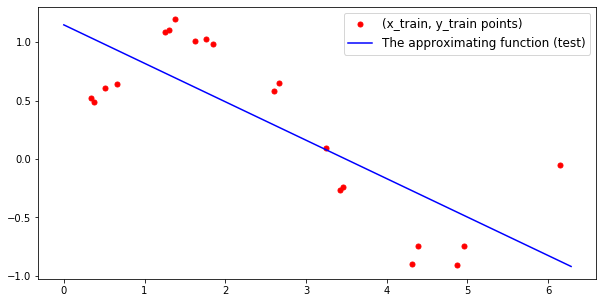

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

test_X = np.linspace(0, 2*np.pi, 20)
test_X = np.vstack([test_X, np.ones(len(random_X))]).T
test_Y = test_X @ w # = kx + b

plt.figure(figsize=(10, 5))
plt.plot(train_X[:,0], train_Y, 'ro', label = '(x_train, y_train points)', markersize = 5)
plt.plot(test_X[:,0],  k * test_X[:,0] + b, 'blue', label = 'The approximating function (test)')
plt.legend(shadow = False, fontsize = 12)

I guess it's not as good as we want it to be. Our model is too inaccurate, so it's necessary to fix it. Let's cheak out what will be, if we use polynomials.

In [5]:
N = 20
train_X = train_X[:,0]
# Будем запоминать коэфы в матрицу 7 * 8
# Она нам понадобится, чтобы вывести графики и найти нужный многочлен с минимальной ошибкой   
polynom_mat = np.zeros((13, 14))  # В многочлене степени k (k + 1) слагаемое

for k in range(1, 14):
    # https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Случай_полиномиальной_модели
    A = np.zeros((k + 1, k + 1))
    A[0, 0] = N
    # Заполняем диагональ матрицы
    for i in range(1, k + 1):
        for elem in train_X:
            A[i, i] += elem ** (i * 2)
    
    # Заполняем остальное по принципу строка-столбец в силу симметрии
    a = 0
    for i in range(k + 1):  #  Строки
        a += 1  # Элемент A[a, a] не трогаем, т. к. диагональ мы уже заполнили
        for j in range(a, k + 1):  #  Столбцы
            for elem in train_X:
                A[i, j] += elem ** (i + j)
            A[j, i] = A[i, j] # По симметрии

    # На этом этапе матрица A найдена, ищем вектор результатов
    c = np.zeros(k + 1)
    for i in range(k + 1):
        for j in range(N):
            c[i] += (train_X[j] ** (i)) * train_Y[j]

    # Найдено
    # Теперь ищет столбец коэффицентов многочлена b
    # Решаем СЛУ Ab = c
    b = np.dot(linal.inv(A), c) 
    # Коэфиценты многочлена найдены
    # Вносим их в общую матрицу
    for j in range(len(b)):
        polynom_mat[k - 1, j] = b[j]

OK, we has the matrix of all polynomials from 1 to 7 degree. Let's see, how good is our model now.

In [6]:
def DrawPolyXi(xx, koeffs):
    res_arr = []
    for i in range(len(xx)):
        pow = 0
        value = 0
        for koef in koeffs:
            value += koef * (xx[i] ** pow)
            pow += 1
        res_arr.append(value)
    return res_arr

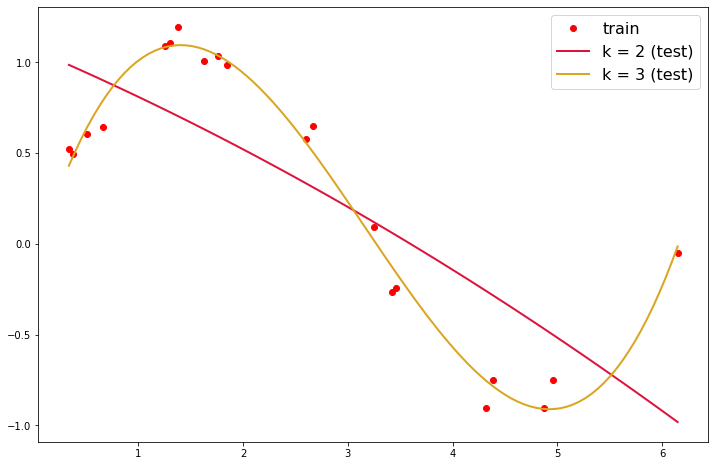

In [7]:
plt.figure(figsize=(12, 8))
x = np.linspace(min(train_X), max(train_X), 100)
# Points
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
# Polynomials
plt.plot(x, DrawPolyXi(x, polynom_mat[1]), 'crimson', label = 'k = 2 (test)', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[2]), 'goldenrod', label = 'k = 3 (test)', linewidth = 2)

plt.legend(shadow = False, fontsize = 16)

As we see, 2nd degree polynomial is more accurate, than linear model, but it's unreally to do the good prediction. The 3rd is doing better. Now I'm goind to unhide the pool of polynomials.

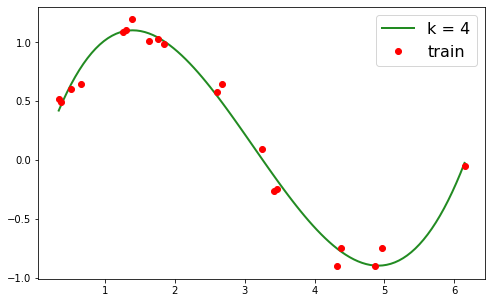

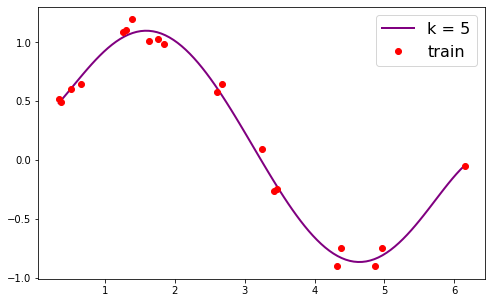

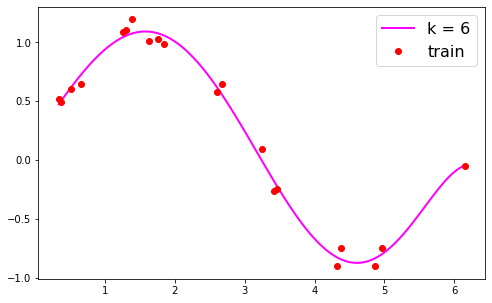

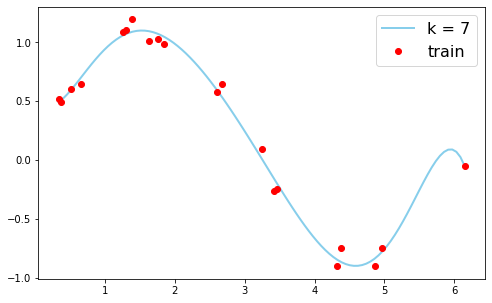

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[3]), 'forestgreen', label = 'k = 4', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[4]), 'purple', label = 'k = 5', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[5]), 'magenta', label = 'k = 6', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[6]), 'skyblue', label = 'k = 7', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)


There's obviously overfitting in k = 7: model is really close-fitted to sample. What's next?

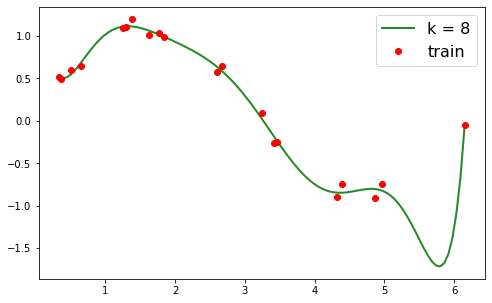

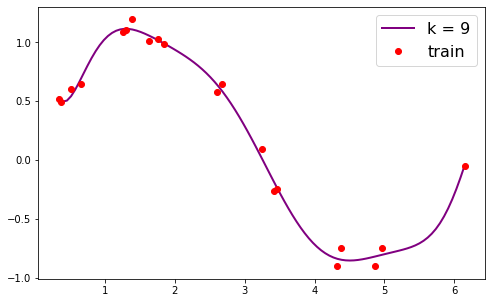

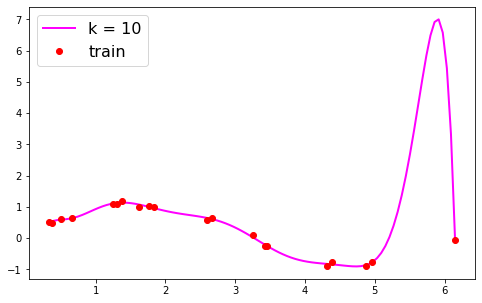

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[7]), 'forestgreen', label = 'k = 8', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[8]), 'purple', label = 'k = 9', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[9]), 'magenta', label = 'k = 10', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

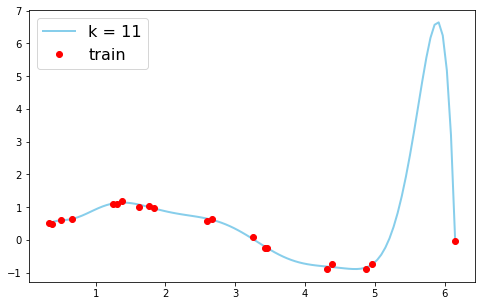

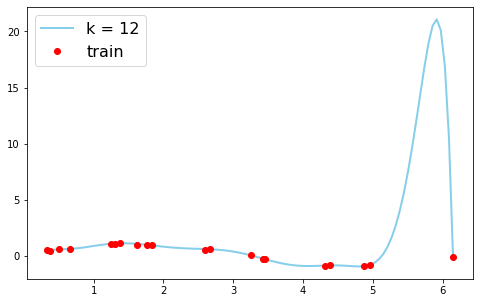

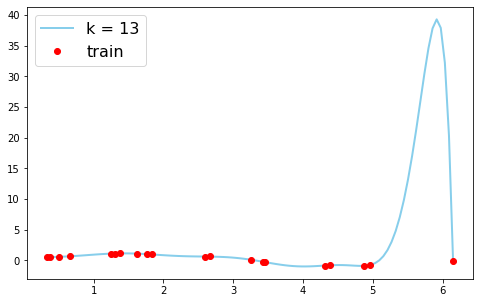

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[10]), 'skyblue', label = 'k = 11', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[11]), 'skyblue', label = 'k = 12', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

plt.figure(figsize=(8, 5))
plt.plot(x, DrawPolyXi(x, polynom_mat[12]), 'skyblue', label = 'k = 13', linewidth = 2)
plt.plot(train_X, train_Y, 'ro', label='train', markersize = 6)
plt.legend(shadow = False, fontsize = 16)

What do we see? We got the overfitting, so that it's now unreal to prognose because our model is adjusted to train data excessively. 

In [11]:
test_X = np.linspace(0, 2*np.pi, 20)
test_Y = np.sin(test_X)

def MSE_find(N, data_X, data_Y, coeffs):
    MSE = 0
    for i in range(N):
        pow = 0
        Y_interpolated = 0
        for coef in coeffs:
            Y_interpolated += coef * (data_X[i] ** pow) # Значение многочлена в точке
            pow += 1
        MSE += (Y_interpolated - data_Y[i]) ** 2

    MSE /= N
    return MSE
    

mseTest = np.zeros(14)  
for k in range(1, 14):  
    mseTest[k - 1] = MSE_find(N, test_X, test_Y, polynom_mat[k - 1])

i_rem = 0
for i in range(13):
    if (abs(mseTest[i]) < abs(mseTest[i_rem])):
        i_rem = i

print('MSEs:')
print(mseTest)
print()
print('The minimal MSE on test: ', mseTest[i_rem])
print('The degree of the best polynomial: ', i_rem + 1)

i_rem = 0
for i in range(13):
    if (abs(mseTest[i]) > abs(mseTest[i_rem])):
        i_rem = i
print('The maximal MSE on test: ', mseTest[i_rem])
print('The degree of the worst polynomial: ', i_rem + 1)

MSEs:
[2.62491117e-01 2.65681694e-01 1.47040956e-02 1.47804174e-02
 1.83901490e-02 1.85712792e-02 5.69048312e-02 5.49256135e-01
 3.18032246e-01 1.50456264e+01 1.30818713e+01 1.50583096e+02
 5.62870694e+02 0.00000000e+00]

The minimal MSE on test:  0.014704095627452968
The degree of the best polynomial:  3
The maximal MSE on test:  562.8706940633059
The degree of the worst polynomial:  13


We observe the refinement of the model. It's excellent, but if we got frantic in futher accurancy, we'll immideantly get overfitting, which is fatal for us.

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - use p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and use each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train and validation sets.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

The model from the previous task will be used next.

In [12]:
random_X = []
random_Y = []
for i in range(20):
    random_X.append(round(rnd.random(), 10) * (2 * math.pi)) #[a, b) - rn * (b - a) + a
    eps = (round(rnd.random(), 10) * 0.01)
    random_Y.append(math.sin(random_X[-1]) + eps)
    
valid_X = np.array(random_X)
valid_Y = np.array(random_Y)

# Посмотреть MSE на трейне
# rnd.uniform

We want to produce cross-validation, so we will partsice these samples for $\frac{1}{5}$ for validation and $\frac{4}{5}$ for train parts.

In [13]:
def union(arr_of_arrs):
    output = []
    for arr in arr_of_arrs:
        for elem in arr:
            output.append(elem)
    return np.array(output)

k = 5
# Polynom 2nd degree
N = 16

folds_X = np.array_split(valid_X, k)
folds_Y = np.array_split(valid_Y, k)

# На каждом шаге валидации выбираем обучающую и тестовую выборку
# На обучающих будем подбирать модель с минимальной ошибкой
# И сравнивать результаты ошибок новой модели со старой
# на тестовой выборке
# Под конец выведем модель с наиболее удачными коэффами

# Среднеквадратические ошибки новой модели на каждом валидационном тесте
MSEs_new = np.zeros(5)
polynom_mat_new = np.zeros((5, 3))

for t in range(k):
    train_v_X = union(np.vstack(folds_X[0:t] + folds_X[t + 1::])) # 1 * 16
    train_v_Y = union(np.vstack(folds_Y[0:t] + folds_Y[t + 1::])) # 1 * 16
    test_v_X = folds_X[t] # 1 * 4
    test_v_Y = folds_Y[t] # 1 * 4

    A = np.zeros((3, 3))
    A[0, 0] = N
    for i in range(1, 3):
        for elem in train_v_X:
            A[i, i] += elem ** (i * 2)
        
    a = 0
    for i in range(3):
        a += 1
        for j in range(a, 3):
            for elem in train_v_X:
                A[i, j] += elem ** (i + j)
            A[j, i] = A[i, j]

    
    c = np.zeros(3)
    for i in range(3):
        for j in range(N):
            c[i] += (train_v_X[j] ** (i)) * train_v_Y[j]

    # Найдено
    # Теперь ищет столбец коэффицентов многочлена b
    # Решаем СЛУ Ab = c
    b = np.dot(linal.inv(A), c) 
    # Коэфиценты многочлена найдены, запишем их в общий сет
    for j in range(len(b)):
        polynom_mat_new[t, j] = b[j]
    
    
    # Ищем ошибку на соответствующей тестовой выборке уже для нового многочлена:
    MSEs_new[t] = MSE_find(4, test_v_X, test_v_Y, b)
        
# Выведем матрицу найденных новых многочленов и один старый
print(polynom_mat_new)
print('[', polynom_mat[1][0], polynom_mat[1][1], polynom_mat[1][2], ']')

[[ 0.62390734  0.04631169 -0.05196511]
 [ 0.65275042 -0.12926455 -0.01977434]
 [ 0.92069489 -0.2729105  -0.00125449]
 [ 0.56356992  0.11539164 -0.05681559]
 [ 0.82283733 -0.05992316 -0.04731777]]
[ 1.0703367752421722 -0.24662634123678173 -0.014147322811105884 ]


Now let's output MSEs for all combinations

In [14]:
print(MSEs_new)
min_MSE = MSEs_new[0]
i_rem = 0
for i in range(5):
    if (min_MSE > MSEs_new[i]):
        i_rem = i
        min_MSE = MSEs_new[i]
    print("The MSE for the polynomial number", i + 1, "--", MSEs_new[i])
print("The minimal MSE is reached by the polynomial number", i_rem + 1)
print("Itself:", min_MSE)

[0.13793099 0.20908101 0.40615189 0.34264604 0.3326677 ]
The MSE for the polynomial number 1 -- 0.13793099009416465
The MSE for the polynomial number 2 -- 0.20908101004691948
The MSE for the polynomial number 3 -- 0.40615188729252205
The MSE for the polynomial number 4 -- 0.3426460409454852
The MSE for the polynomial number 5 -- 0.33266770059723444
The minimal MSE is reached by the polynomial number 1
Itself: 0.13793099009416465


What if we compare this to the MSEs of the old polynomial with five validation test dataset that we have generated?

In [15]:
MSEs_old = np.zeros(5)
for i in range(5):
    test_v_X = folds_X[i] # 1 * 4
    test_v_Y = folds_Y[i] # 1 * 4
    
    MSEs_old[i] = MSE_find(4, test_v_X, test_v_Y, polynom_mat[1])

min_MSE = MSEs_old[0]
i_rem = 0
for i in range(5):
    if (min_MSE > MSEs_old[i]):
        i_rem = i
        min_MSE = MSEs_old[i]
    print("The MSE for the old polynomial with", i + 1, "test --", MSEs_old[i])
print("The minimal MSE is reached by the test number", i_rem + 1)
print("Itself:", min_MSE)

The MSE for the old polynomial with 1 test -- 0.09892290129662032
The MSE for the old polynomial with 2 test -- 0.0920138561149036
The MSE for the old polynomial with 3 test -- 0.41521124827149897
The MSE for the old polynomial with 4 test -- 0.1593818493631146
The MSE for the old polynomial with 5 test -- 0.2710179772538823
The minimal MSE is reached by the test number 2
Itself: 0.0920138561149036


Intresting. Let's provide average computings.

In [16]:
print("Average for new:", np.mean(MSEs_new))
print("Average for old:", np.mean(MSEs_old))

Average for new: 0.2856955257952652
Average for old: 0.20730956646000392


As we can see, with the old polynomial we got the most minimal error, but this case can be considered a lucky coincidence as the average error was still higher. And as we can see, there is a visible spread in errors, while with validation everything is better. Hence, we conclude: validation allows you to get a more accurate model.

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is a normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(w^Tx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

In [17]:
# Посмотреть про максимизацию вероятности

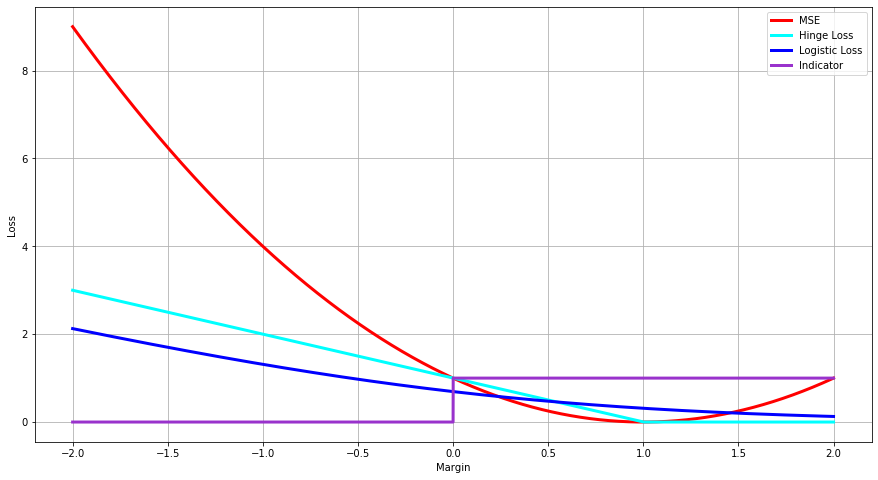

In [18]:
# На занятии: сводится к (1 - M)^2
def MSE(M):
    return (M - 1) * (M - 1)
    
def hinge_loss(M):
    return np.maximum(0, 1 - M)

def logistic_loss(M):
    return np.log(1 + np.exp(-M))

def indicator(M):
    return M >= 0

# Возьмем в качестве M произвольный массив точек
M = np.arange(-2, 2, 1e-4)

plt.figure(figsize=(15, 8))
plt.xlabel('Margin')
plt.ylabel('Loss')

plt.plot(M, MSE(M), 'red', label = 'MSE', linewidth = 3)
plt.plot(M, hinge_loss(M), 'aqua', label = 'Hinge Loss', linewidth = 3)
plt.plot(M, logistic_loss(M), 'blue', label = 'Logistic Loss', linewidth = 3)
plt.plot(M, indicator(M), 'darkorchid', label = 'Indicator', linewidth = 3)

plt.grid()
plt.legend()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\Oleg\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


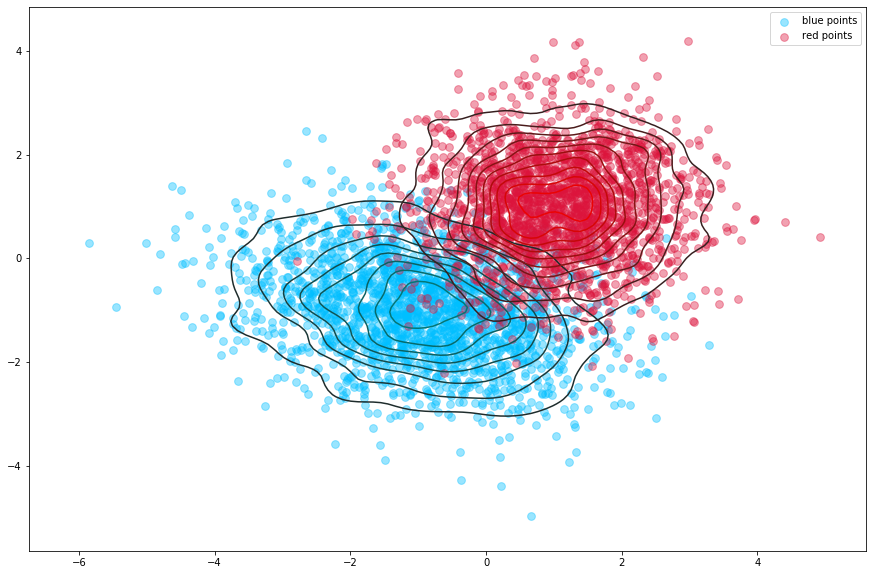

In [19]:
import seaborn as sns

cov_R = np.array([[1., 0.], [0., 1.]])
cov_B = np.array([[1.5, 0.], [-1., 1.]])
RED = np.random.multivariate_normal(mean=[1, 1], cov=cov_R, size=2000)
BLUE = np.random.multivariate_normal(mean=[-1, -1,], cov=cov_B, size=2000)

plt.figure(figsize=(15, 10))
plt.scatter(BLUE[:,0], BLUE[:,1], label='blue points', color='deepskyblue', s=60, alpha=0.4)
sns.kdeplot(BLUE, shade=False, color='teal')
plt.scatter(RED[:,0], RED[:,1], label='red points', color='crimson', s=60, alpha=0.4)
sns.kdeplot(RED, shade=False, color='red')

plt.legend()

In [20]:
y_R = np.ones((2000, 1)) # Признак +1
y_B = -np.ones((2000, 1)) # Признак -1

# Наша выборка
Y = np.vstack([y_R, y_B])
X = np.vstack([RED, BLUE])
# Необходимый единичный признак
X = np.hstack([X, np.ones((4000, 1))])
print(X)

[[ 1.46229694  1.35535101  1.        ]
 [ 1.55304623  2.03442555  1.        ]
 [ 1.05776495  0.73792667  1.        ]
 ...
 [-1.21726681 -1.65261648  1.        ]
 [ 1.2939661  -2.6603409   1.        ]
 [-1.76391774 -0.95601744  1.        ]]


Теперь методом линейной регрессии найдем аппроксимирующую прямую. Как было написано выше, let $X$ is a matrix, where $i$-th row is a feature vector of $i$-th object and $Y$ – a vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$
That's what we are going to use.

k = [0.28939917]
b = [0.39529034]


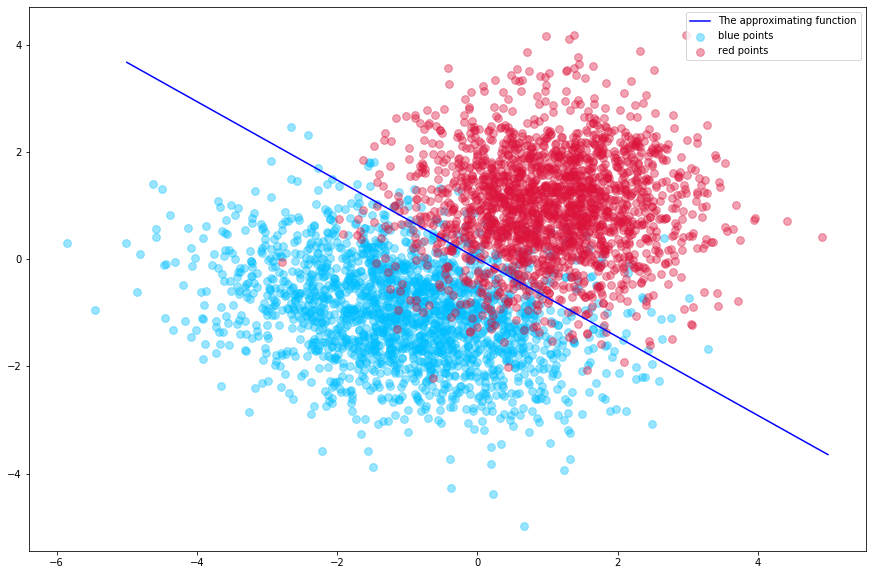

In [21]:
W = np.dot(np.dot(linal.inv(np.dot(X.T, X)), X.T), Y)
k, b = W[0], W[1]
print('k =', k)
print('b =', b)

# Функция, сопоставляющей каждой точке x x', лежащий на прямой
def line_points(W, x_1):
    return np.array(
        [-(W[0] * x + W[2]) / W[1] for x in x_1]
    )

# Отобразим прямую с точками:

plt.figure(figsize=(15, 10))

plt.scatter(BLUE[:,0], BLUE[:,1], label='blue points', color='deepskyblue', s=60, alpha=0.4)
plt.scatter(RED[:,0], RED[:,1], label='red points', color='crimson', s=60, alpha=0.4)

x_1 = np.array([-5, 5])
plt.plot(x_1,  line_points(W, x_1), 'blue', label = 'The approximating function')
plt.legend(shadow = False, fontsize = 12)

plt.legend()

Сложность?

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

Например, будем использовать функцию $Q(x, y) = 4x^2 + y + 6x + 4yx + 11y^2$. Тогда ее градиент $\triangledown Q(x, y) = (8x + 6 + 4y, 1 + 4x + 22y)$\
Можно составить и решить систему линейных уравнений:
$$\begin{pmatrix}
8 & 4 & | -6\\
4 & 22 & | -1\\
\end{pmatrix}$$

In [22]:
A = np.array([[8, 4], [4, 22]])
y = np.array([-6, -1])
ans = np.linalg.solve(A, y)
print(ans)

def Q(x, y):
    return 4 * x ** 2 + y + 6 * x + 4 * x * y + 11 * y ** 2

def grad_Q(xy):
    return np.array([8 * xy[0] + 6 + 4 * xy[1], 1 + 4 * xy[0] + 22 * xy[1]])

print(Q(ans[0], ans[1]))

[-0.8  0.1]
-2.35


Точка (-0.8, 0.1) - точка экстремума. Скорее всего функция принимает в ней значение глобального минимума, т.е. минимума на всей области определения. Теперь найдем этот минимум с помощью градиентного спуска (примитивная реализация по определению).

In [23]:
def GD(grad, x_init, lambd=1e-4, eps=1e-6):
    x = x_init
    path = []
    
    while(True):
        path.append(x.copy())
        gd = grad(x)
        if np.linalg.norm(gd) < eps:
            return x, np.array(path)
        x -= lambd * gd

In [24]:
min_x, path = GD(grad_Q, np.array([-2., 1.]))
print(min_x)

[-0.80000014  0.10000004]


Действительно, предположение оказалось верным - мы и вравду получили точку глобального минимума функции. Выведем траекторию спуска.\
Задание: разобраться в рисовании таких графиков - https://ru.wikibooks.org/wiki/Реализации_алгоритмов/Градиентный_спуск

[4.00000e-04 1.20040e+00 2.40040e+00 3.60040e+00 4.80040e+00 6.00040e+00
 7.20040e+00 8.40040e+00 9.60040e+00 1.08004e+01 1.20004e+01 1.32004e+01
 1.44004e+01 1.56004e+01 1.68004e+01 1.80004e+01 1.92004e+01 2.04004e+01
 2.16004e+01 2.28004e+01 2.40004e+01 2.52004e+01 2.64004e+01 2.76004e+01
 2.88004e+01 3.00004e+01 3.12004e+01 3.24004e+01 3.36004e+01 3.48004e+01
 3.60004e+01 3.72004e+01 3.84004e+01 3.96004e+01]


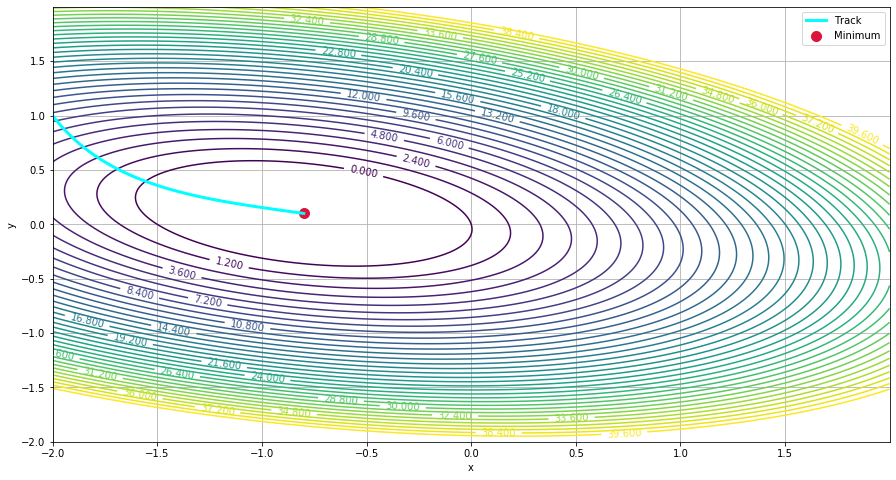

In [25]:
plt.figure(figsize=(15, 8))
plt.xlabel('x')
plt.ylabel('y')

x, y = np.arange(-2, 2, 0.001), np.arange(-2, 2, 0.001)
x_grid, y_grid = np.meshgrid(x, y)
q_grid = Q(x_grid, y_grid)

# Контуры
levels = np.arange(0.0001, 10., 0.3) * 4
print(levels)
contour = plt.contour(x_grid, y_grid, q_grid, levels)
plt.clabel(contour, inline=True, fontsize=10)

# Траектория спуска
plt.plot(path[:, 0], path[:, 1], linewidth=3, color='aqua', label='Track')
# Точка минимума
plt.scatter(min_x[0], min_x[1], s = 100, color='crimson', label='Minimum')

plt.grid()
plt.legend()

Шаг влияет прежде всего на то, насколько быстро мы подбираемся к точке минимума. С другой стороны, если сделать шаг очень большим, мы можем и вовсе не попасть в минимум и ходить вокруг да около долгое время.

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

$$f(x, y) = 1 - 2x + x^2 + 100y^2 - 200x^2y + 100x^4$$
$$\triangledown f(x) = (-2 + 2x - 400xy + 400x^3, 200y - 200x^2)$$

Глобальный минимум - 0, достигется в точке (1, 1)

In [26]:
def Rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

print(Rosenbrock(1, 1))

0


In [27]:

def Rosenbrock_gd(x):
    return np.array([
        2*(1-x[0]) * (-1) + 2*100*(x[1] - x[0]**2)*(-2*x[0]),
        2*100*(x[1] - x[0]**2)
        ])

In [28]:
def GD_times(grad, x_init, lambd=0.00021, eps=1e-6):
    x = x_init
    path = []
    
    for i in range(1000000):
        path.append(x.copy())
        gd = grad(x)
        if np.linalg.norm(gd) < eps:
            return x, np.array(path)
        x -= lambd * gd
    return x, np.array(path)

min_x, path = GD_times(Rosenbrock_gd, np.array([-2., 4.]))
print(min_x)

# min_x, path = GD(Rosenbrock_gd, np.array([-2., 4.]), 1e-10)
# print(min_x)

[0.99999888 0.99999776]


[  1.  31.  61.  91. 121. 151. 181. 211. 241. 271. 301. 331. 361. 391.
 421. 451. 481. 511. 541. 571. 601. 631. 661. 691. 721. 751. 781. 811.
 841. 871. 901. 931. 961. 991.]


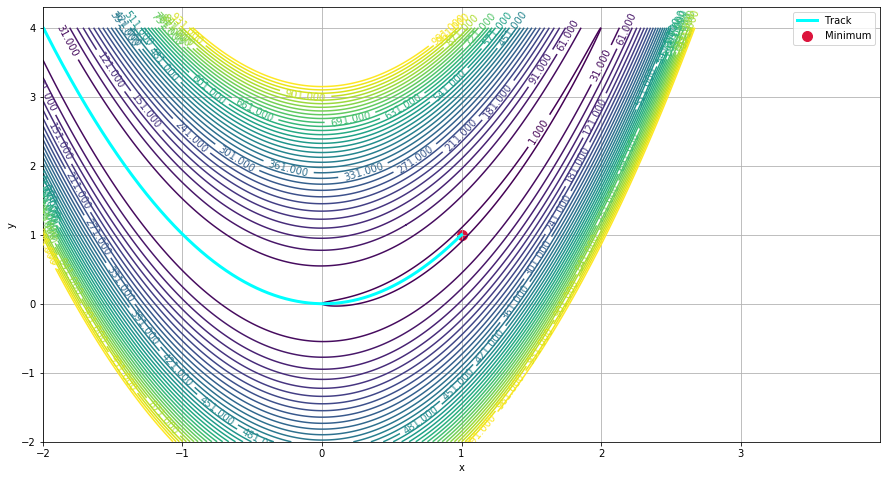

In [29]:
plt.figure(figsize=(15, 8))
plt.xlabel('x')
plt.ylabel('y')

x, y = np.arange(-2, 4, 0.001), np.arange(-2, 4, 0.001)
x_grid, y_grid = np.meshgrid(x, y)
q_grid = Rosenbrock(x_grid, y_grid)

# Контуры
levels = np.arange(0.01, 10., 0.3) * 100
print(levels)
contour = plt.contour(x_grid, y_grid, q_grid, levels)
plt.clabel(contour, inline=True, fontsize=10)

# Траектория спуска
plt.plot(path[:, 0], path[:, 1], linewidth=3, color='aqua', label='Track')
# Точка минимума
plt.scatter(min_x[0], min_x[1], s = 100, color='crimson', label='Minimum')

plt.grid()
plt.legend()

Проблема заключается в долгой работе алгоритма: нужно либо делать шаг больше, либо делать большее число шагов. Во втором случае алгоритм работает долго, а в первом - он не останавливается (через while). Объясняется это тем, что так как шаг большой, в какой-то момент мы не можем приблизиться к точке минимума и ходим вокруг нее. Пожалуй, наиболее разумным решением будет динамическое изменение шага.

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Compare gradient descent methods and show its convergence in axes $[step \times Q]$.

$$MSE(w) = \frac{1}{n}(Xw-Y) ^ 2$$

$$\nabla MSE(w) = \frac{2}{n}X^T(Xw-Y)$$

Сгенерируем точки

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


X:
 [[ 1.46229694  1.35535101  1.        ]
 [ 1.55304623  2.03442555  1.        ]
 [ 1.05776495  0.73792667  1.        ]
 ...
 [-1.21726681 -1.65261648  1.        ]
 [ 1.2939661  -2.6603409   1.        ]
 [-1.76391774 -0.95601744  1.        ]]


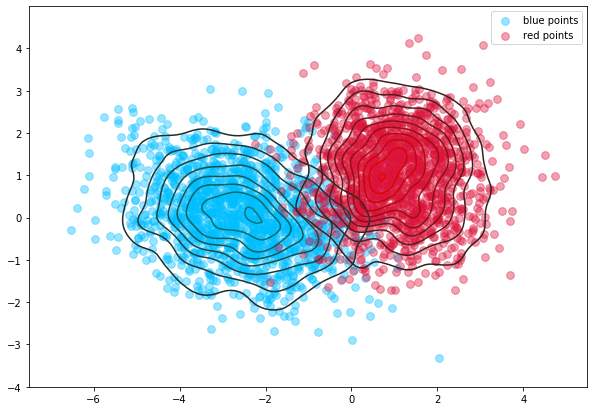

In [30]:
cov_R = np.array([[1., 0.], [0., 1.]])
cov_B = np.array([[1.5, 0.], [-1., 1.]])
RED = np.random.multivariate_normal(mean=[1, 1], cov=cov_R, size=1500)
BLUE = np.random.multivariate_normal(mean=[-2.5, 0,], cov=cov_B, size=1500)

plt.figure(figsize=(10, 7))
plt.scatter(BLUE[:,0], BLUE[:,1], label='blue points', color='deepskyblue', s=60, alpha=0.4)
sns.kdeplot(BLUE, shade=False, color='teal')
plt.scatter(RED[:,0], RED[:,1], label='red points', color='crimson', s=60, alpha=0.4)
sns.kdeplot(RED, shade=False, color='red')

plt.legend()

y_R = np.ones((1500, 1)) # Признак +1
y_B = -np.ones((1500, 1)) # Признак -1

# Наша выборка
Y_train = np.vstack([y_R, y_B])
X_train = np.vstack([RED, BLUE])
# Необходимый единичный признак
X_train = np.hstack([X_train, np.ones((3000, 1))])
print("X:\n", X)

In [31]:
def MSE(w, X, Y):
    return np.mean((X @ w - Y) ** 2)

def MSE_grad(w, X, Y):
    return 2 / len(Y) * (X.T @ (X @ w - Y))

Решение с градиентным спуском:

In [32]:
w_gd = np.zeros((3, 1))
MSEs = [MSE(w_gd, X_train, Y_train)]
for i in range(100):
    w_gd = w_gd - 0.07 * MSE_grad(w_gd, X_train, Y_train)
    MSEs.append(MSE(w_gd, X_train, Y_train))

Аналитическое решение:

In [33]:
W = np.dot(np.dot(linal.inv(np.dot(X.T, X)), X.T), Y)
k, b = W[0], W[1]
print('k =', k)
print('b =', b)

k = [0.28939917]
b = [0.39529034]


[[ 0.28939917]
 [ 0.39529034]
 [-0.00553094]]
[[0.36117387]
 [0.19402841]
 [0.17666693]]


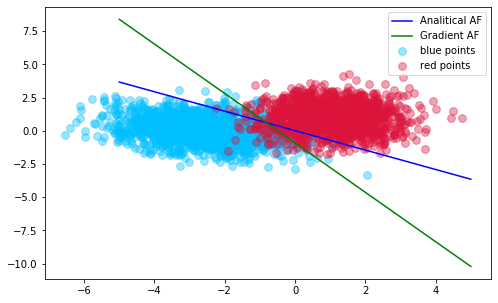

In [34]:
# Отобразим прямую с точками:

plt.figure(figsize=(8, 5))

plt.scatter(BLUE[:,0], BLUE[:,1], label='blue points', color='deepskyblue', s=60, alpha=0.4)
plt.scatter(RED[:,0], RED[:,1], label='red points', color='crimson', s=60, alpha=0.4)

x_1 = np.array([-5, 5])
plt.plot(x_1,  line_points(W, x_1), 'blue', label = 'Analitical AF')
plt.plot(x_1,  line_points(w_gd, x_1), 'green', label = 'Gradient AF')
plt.legend(shadow = False, fontsize = 12)

plt.legend()

print(W, w_gd, sep='\n')

Видим, что прямые получились полностью идентичными, но в случае с градиентным спуском возможно улучшение точности, так как мы искали минимум функции среднеквадратической ошибки.

Теперь будем вычислять шаг с каждой итерацией. Пусть $g$ - текущее значение градиента.

In [35]:
def step(X, Y, w, g):
    Xg = X @ g
    return (Xg.T @ (X @ w - Y)) / (Xg.T @ Xg)

In [36]:
w_gd = np.zeros((3, 1))
MSEs_fast = [MSE(w_gd, X_train, Y_train)]
for i in range(100):
    g = MSE_grad(w_gd, X_train, Y_train)
    lambda_ = step(X_train, Y_train, w_gd, g)
    w_gd = w_gd - lambda_ * g
    MSEs_fast.append(MSE(w_gd, X_train, Y_train))
    
print("W analitic:", W, "W grad:", w_gd, sep='\n')

W analitic:
[[ 0.28939917]
 [ 0.39529034]
 [-0.00553094]]
W grad:
[[0.36118354]
 [0.19399937]
 [0.17671505]]


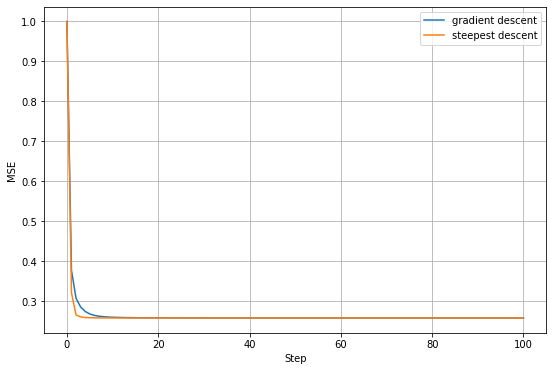

In [37]:
points = list(range(101))

plt.figure(figsize=(9, 6))
plt.xlabel('Step')
plt.ylabel('MSE')
plt.plot(points, MSEs, label='gradient descent')
plt.plot(points, MSEs_fast, label='steepest descent')

plt.grid()
plt.legend();

Как можно видеть, steepest достигаем минимума за меньшее число итераций.

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [38]:
data_train = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1)
data_test = np.loadtxt('mnist_test.csv', delimiter=',', skiprows=1)
X_train, y_train = data_train[:, 1:], data_train[:, 0:1]
X_test, y_test = data_test[:, 1:], data_test[:, 0:1]

Train sample


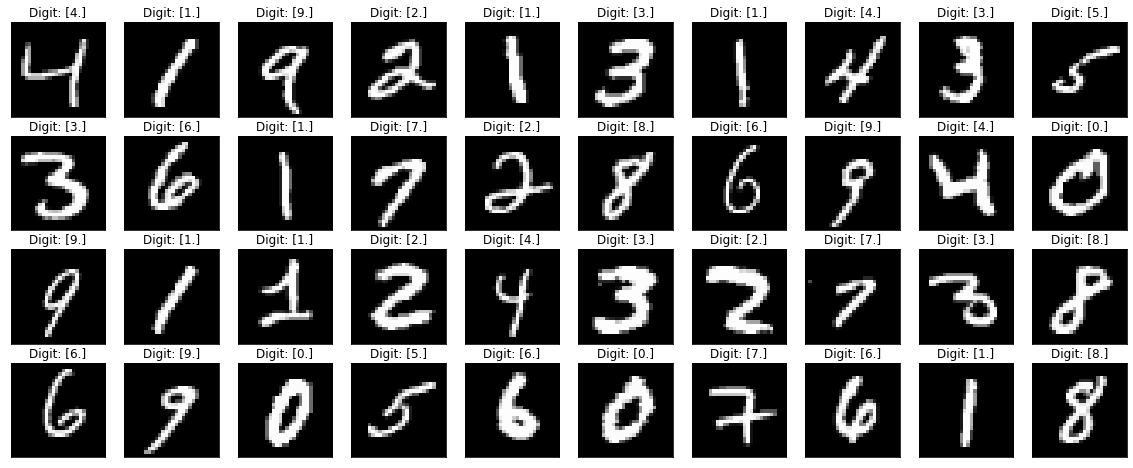

In [39]:
print('Train sample')

img_height, img_width = 28, 28
plot_width, plot_height = 10, 4

fig = plt.figure(figsize=(2 * plot_width, 2 * plot_height))
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_train[sample_n].reshape(img_height, img_width), cmap="gray")
    ax.set_title('Digit: {}'.format(y_train[sample_n]))

Test sample


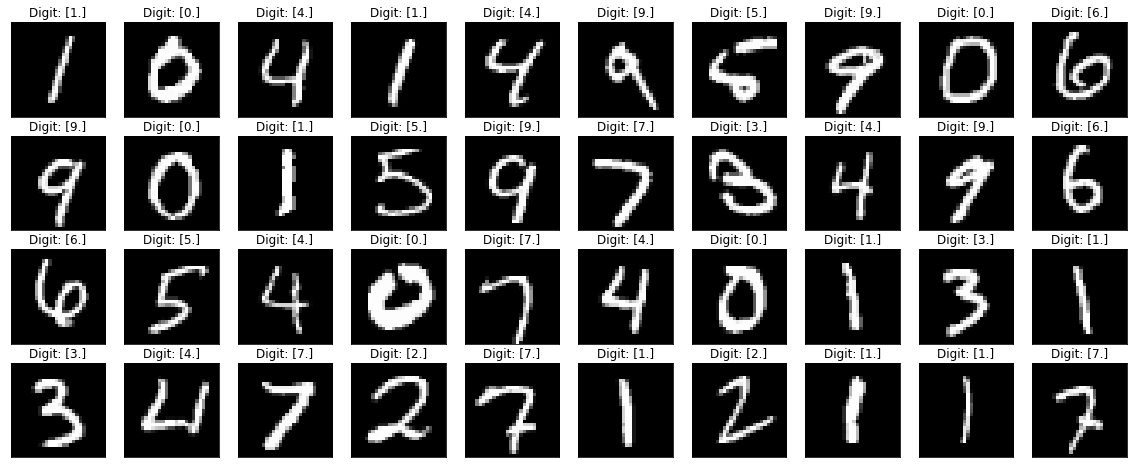

In [40]:
print('Test sample')
img_height, img_width = 28, 28
plot_width, plot_height = 10, 4

fig = plt.figure(figsize=(2 * plot_width, 2 * plot_height))
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_test[sample_n].reshape(img_height, img_width), cmap="gray")
    ax.set_title('Digit: {}'.format(y_test[sample_n]))

Train


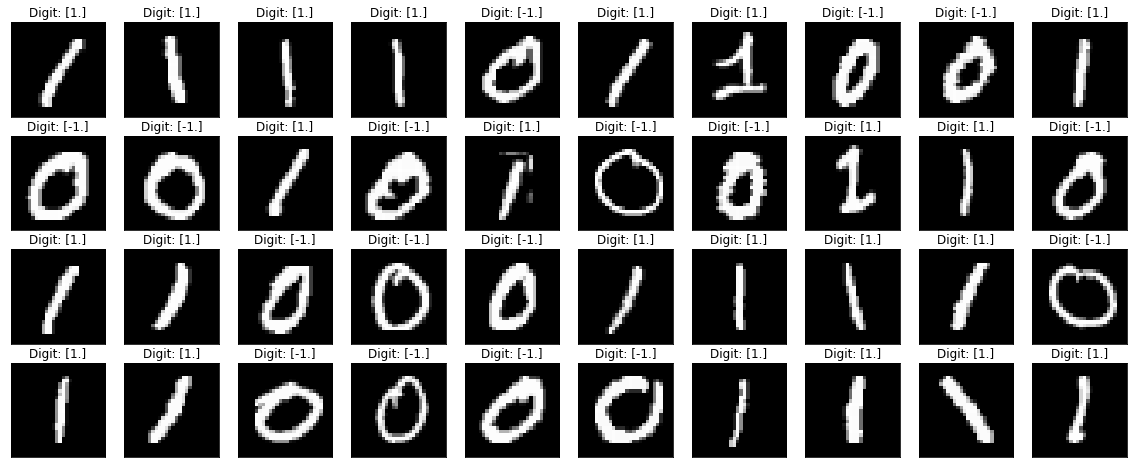

In [41]:
# Разбиение на классы: 0 ~ -1, 1 ~ +1
print('Train')
index = ((y_train == 1) | (y_train == 0)).flatten()

X_train = X_train[index]
y_train = y_train[index]

y_train[y_train == 0] = -1

img_height, img_width = 28, 28
plot_width, plot_height = 10, 4

fig = plt.figure(figsize=(2 * plot_width, 2 * plot_height))
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_train[sample_n].reshape(img_height, img_width), cmap="gray")
    ax.set_title('Digit: {}'.format(y_train[sample_n]))

Test


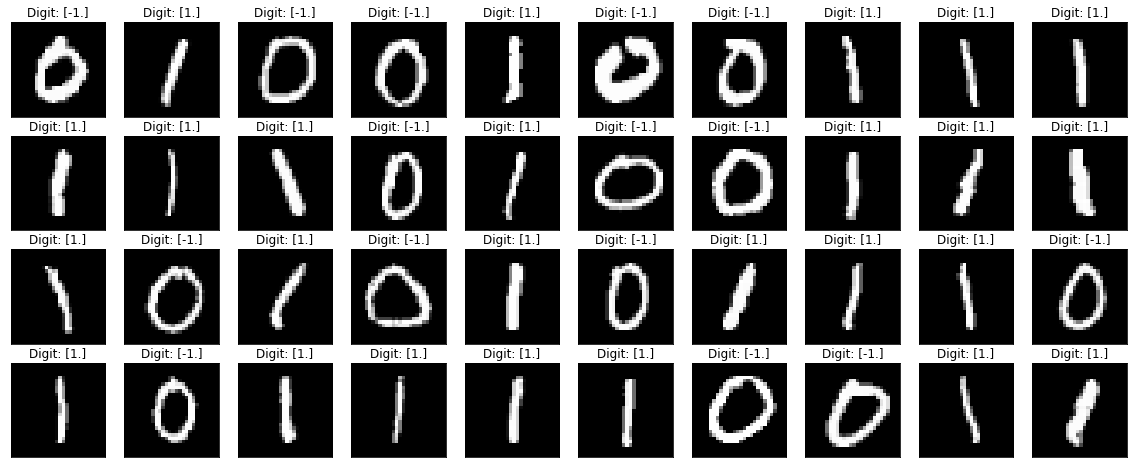

In [42]:
# Разбиение на классы: 0 ~ -1, 1 ~ +1
print('Test')
index = ((y_test== 1) | (y_test == 0)).flatten()

X_test = X_test[index]
y_test = y_test[index]

y_test[y_test == 0] = -1

img_height, img_width = 28, 28
plot_width, plot_height = 10, 4

fig = plt.figure(figsize=(2 * plot_width, 2 * plot_height))
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_test[sample_n].reshape(img_height, img_width), cmap="gray")
    ax.set_title('Digit: {}'.format(y_test[sample_n]))

In [43]:
def batch_iterator(X, y, batch_size=32):    
    begin = 0
    while begin < len(y):
        end = begin + batch_size
        yield X[begin:end, :], y[begin:end]
        begin = end

Логистическая функция потерь:

$$Q(w) = \frac{1}{\mathcal{l}} \sum_{x, y} \log(1 + \exp(-ywx))$$

Ее производная (для градиента):

$$\frac{\partial Q}{\partial w^j} = \frac{1}{l} \sum_{x, y} \frac{-y}{1 + \exp(ywx)} \cdot x^j$$

Примечание: необходит конкретный критерий остановки обучения

In [44]:
def Log_loss(X, y, w):
    size = len(y)
    
    margin = y *(X @ w)
    errors = np.zeros(y.shape)
    
    # truncate too much values
    index = (margin <= -100.0)
    errors[index] = -margin[index]
    
    index = ~index
    errors[index] = np.log(1.0 + np.exp(-margin[index]))
    
    return errors.sum() / size

def Log_loss_grad(X, y, w):
    size = len(y)
    margin = y*(X@w)
    
    # truncate too much values
    margin[margin > 100.0] = 100.0
    denominator = 1.0 + np.exp(margin)
    
    return X.T @ (-y / denominator)

# Экспотенциальное сглаживание:
# Качество можно измерять только на основе текущего батча, а затем находить
# среднее значение качества по все батчам на основе сглаживания
# При этом предыдущие значения хранить нет смысла.
def smooth(loss, gamma=0.9):
    iterable = iter(loss)
    loss = [next(iterable)]
    
    for value in iterable:
        loss.append(loss[-1] * gamma + (1 - gamma) * value)
    
    return np.array(loss)

In [45]:
# Стохастический градиент представляет собой градиентный спуск на частях выборки - батчах
def stohastic_gradient_descent(func, grad_func, X, y, w_init, step=1e-3, batch_size=32, epoch_n=3):
    w = w_init.copy()
    loss = []
    for _ in range(epoch_n):
        for X_batch, y_batch in batch_iterator(X, y, batch_size):
            loss.append(func(X_batch, y_batch, w))
            grad = grad_func(X_batch, y_batch, w)

            w -= step * grad

    return w, np.array(loss)

(1, 1)
(2, 8)
(3, 32)
(4, 64)
(5, 128)


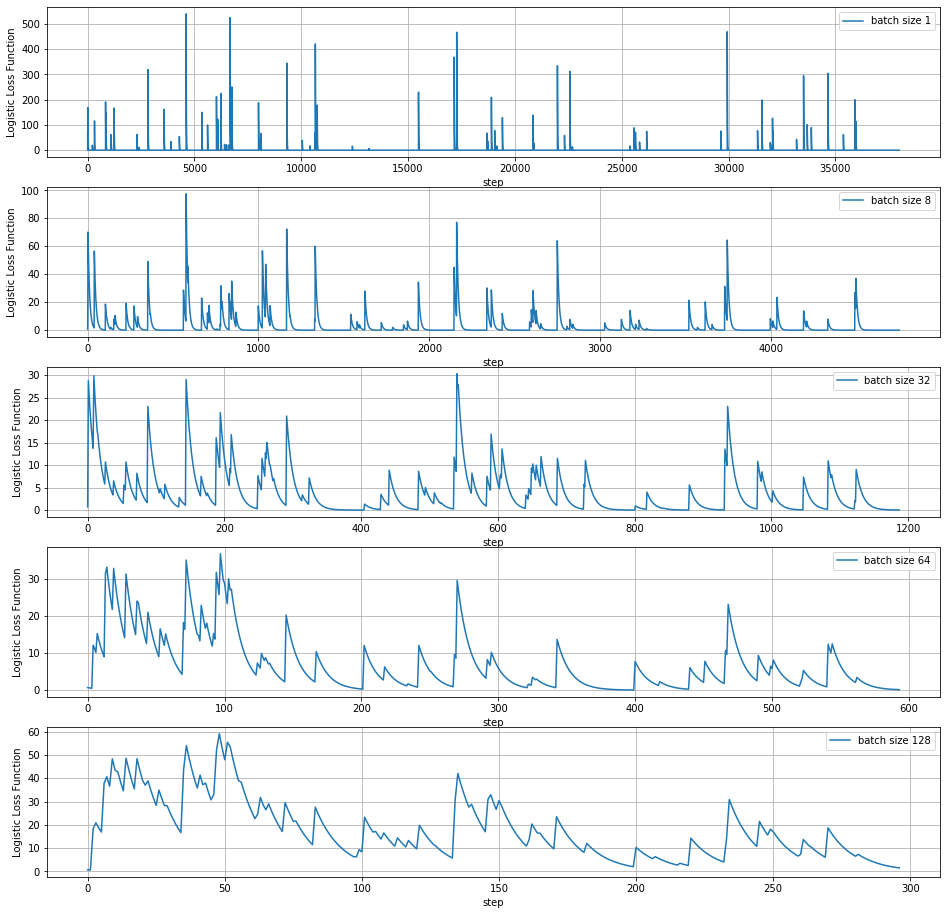

In [46]:
_, width = X_train.shape

plt.figure(figsize=(16, 16))
# enumerate([1, 8, 32, 128], 1) - различные значение батча и индекс, т. е.
# (1, 1), (2, 8), (3, 32), (64, 4), (128 5)
for i, batch_size in enumerate([1, 8, 32, 64, 128], 1):
    print('(', i, ", ", batch_size, ')', sep='')
    w, loss = stohastic_gradient_descent(
        Log_loss,
        Log_loss_grad,
        X_train,
        y_train,
        np.zeros((width, 1)),
        batch_size = batch_size
    )
    
    plt.subplot(5, 1, i)
    
    plt.xlabel('step')
    plt.ylabel('Logistic Loss Function')
    
    plt.plot(smooth(loss), label='batch size {size}'.format(size=batch_size))

    plt.grid()
    plt.legend()
    

При одинаковом числе эпох, чем больше размер батча - тем меньше требуется времени. Однако, необходимо подобрать оптимальный его опитимальный размер: в нашем случае наилучшая точность (наименьшее значение функции потерь) достигается при размере батча в 32. При этом на размере в 64 точность ухудшается незначительно, однако итерироваться приходится в два раза меньше.

Оценим точность на тестовой выборке

In [47]:
def accuracy(y_real, y_prognosed):
    return (y_real == y_prognosed).sum() / len(y_real)

In [48]:
w, _ = stohastic_gradient_descent(
    Log_loss,
    Log_loss_grad,
    X_train,
    y_train,
    np.zeros((width, 1)),
)

y_prognose = X_test @ w

y_prognose[y_prognose >= 0] = +1
y_prognose[y_prognose < 0] = -1

print(y_prognose.shape)
print(y_test.shape)

(2115, 1)
(2115, 1)


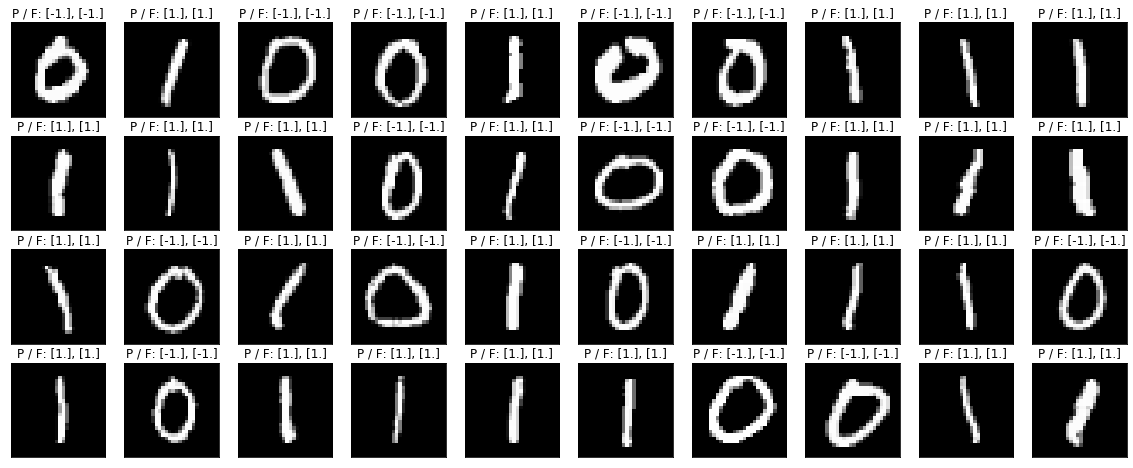

In [49]:
img_height, img_width = 28, 28
plot_width, plot_height = 10, 4

fig = plt.figure(figsize=(2 * plot_width, 2 * plot_height))
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(X_test[sample_n].reshape(img_height, img_width), cmap="gray")
    #ax.set_title('P / F: {0}, {1}'.format(y_prognose[sample_n]), format(y_test[sample_n]))
    ax.set_title('P / F: {P}, {F}'.format(P = y_prognose[sample_n], F = y_test[sample_n]))

In [50]:
print('Accuracy = {}%'.format(accuracy(y_test, y_prognose) * 100))

Accuracy = 99.90543735224587%


#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

$$\triangledown Q(x, y) = (20x, 2y)$$

In [51]:
def new_Q(x, y):
    return 10 * x ** 2 + y ** 2

def new_Q_grad(XY):
    return np.array([20 * XY[0], 2 * XY[1]])

min_x, path = GD(new_Q_grad, np.array([0., 4.]), 0.09)
print(min_x)

print(new_Q(min_x[0], min_x[1]))
print(new_Q(1.01851799e-09, 1.20324826e-08))

[0.00000000e+00 4.17813082e-07]
1.7456777189909884e-13
1.5515442647883916e-16


[ 0.05  1.55  3.05  4.55  6.05  7.55  9.05 10.55 12.05 13.55 15.05 16.55
 18.05 19.55 21.05 22.55 24.05 25.55 27.05 28.55 30.05 31.55 33.05 34.55
 36.05 37.55 39.05 40.55 42.05 43.55 45.05 46.55 48.05 49.55]


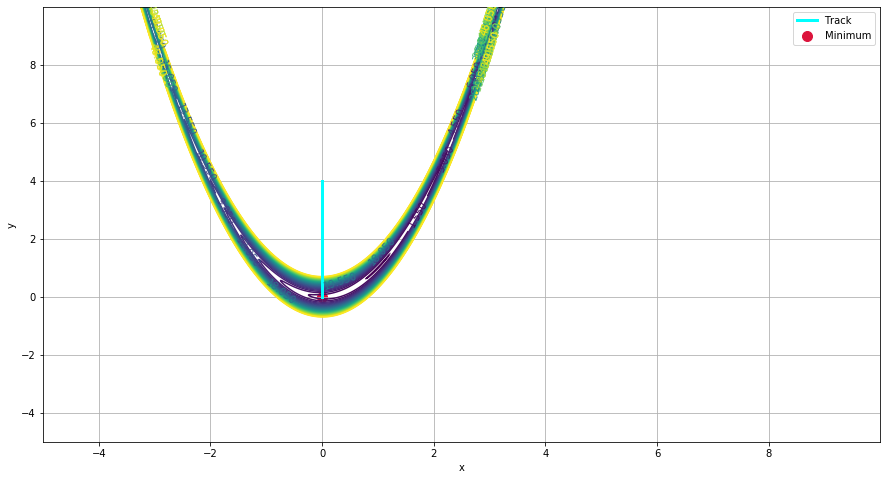

In [52]:
plt.figure(figsize=(15, 8))
plt.xlabel('x')
plt.ylabel('y')

x, y = np.arange(-5, 10, 0.01), np.arange(-5, 10, 0.01)
x_grid, y_grid = np.meshgrid(x, y)
q_grid = Rosenbrock(x_grid, y_grid)

# Контуры
levels = np.arange(0.01, 10., 0.3) * 5
print(levels)
contour = plt.contour(x_grid, y_grid, q_grid, levels)
plt.clabel(contour, inline=True, fontsize=10)

# Траектория спуска
plt.plot(path[:, 0], path[:, 1], linewidth=3, color='aqua', label='Track')
# Точка минимума
plt.scatter(min_x[0], min_x[1], s = 100, color='crimson', label='Minimum')

plt.grid()
plt.legend()

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)